# CRISP-DM

## Business Understanding

According to data acquired from the Federal Bureau of Intelligence (FBI) and Geneva International Center for Justice, hate speech and hate crimes have both been on the rise. The classes targeted by hate also change as has been documented over the past few decades. The classes at highest risk of hate crimes are usually reflected in trends of societal hate speech. Understanding the trends and patterns of hate speech will allow us to understand the classes currently at highest risk and modify existing plans to better protect those classes and educate against trending bigotry.

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def final_dataset():
    # For all datasets, we will clean them up to just 
    # be tweets and labels where 0 = Not Hate Speech and 1 = Hate Speech
    # and then combine into one final dataset
    
    df_train = pd.read_csv('Modeling/Data/hate_speech_training.csv') 
    df_train = df_train.drop('id', axis = 1) 
    
    df_train_2 = pd.read_csv('Modeling/Data/hate_speech_training_2.csv')
    df_train_2 = df_train_2[['tweet', 'class']]
    df_train_2['class'] = df_train_2['class'].replace([0], 'hate speech')
    df_train_2['class'] = df_train_2['class'].replace([1, 2], 'not hate speech')
    df_train_2['class'] = df_train_2['class'].replace(['hate speech'], 1)
    df_train_2['class'] = df_train_2['class'].replace(['not hate speech'], 0)
    df_train_2.rename(columns = {'class': 'label'}, inplace = True) 
    
    df_train_3 = pd.read_csv('Modeling/Data/hate_speech_training_3.csv')
    df_train_3 = df_train_3.drop('index', axis = 1) 
    df_train_3.rename(columns = {'post': 'tweet'}, inplace = True)
    
    df_train_4 = pd.read_csv('Modeling/Data/hate_speech_training_4.tsv', sep = '\t')
    df_train_4 = df_train_4[['text', 'HS']] 
    df_train_4.rename(columns = {'text': 'tweet', 'HS': 'label'}, inplace = True)
    
    df_train_5 = pd.read_csv('Modeling/Data/hate_speech_training_5.csv')
    df_train_5['Label'] = df_train_5['Label'].replace(['Hate', 'Non-Asian Aggression'], 1)
    df_train_5['Label'] = df_train_5['Label'].replace(['Neutral', 'Counterhate'], 0) 
    df_train_5.rename(columns = {'Text': 'tweet', 'Label': 'label'}, inplace = True)
    
    dfs = [df_train, df_train_2, df_train_3, df_train_4, df_train_5]
    final_df = pd.concat(dfs)
    
    return final_df

In [3]:
df = final_dataset()

### Class Balance Between Hate Speech and Not Hate Speech

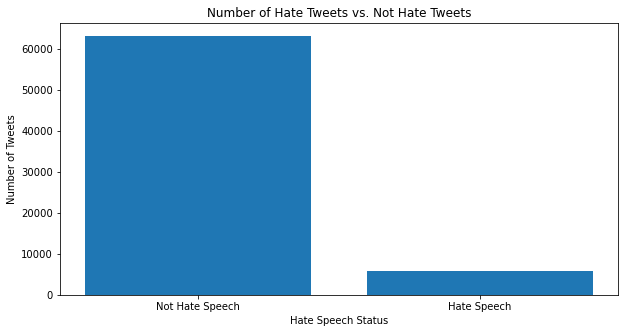

In [4]:
fig_1, ax_1 = plt.subplots(figsize = (10,5))

x = ['Not Hate Speech', 'Hate Speech']
y = df['label'].value_counts().values

ax_1.bar(x, y)
ax_1.set_title('Number of Hate Tweets vs. Not Hate Tweets')
ax_1.set_xlabel('Hate Speech Status')
ax_1.set_ylabel('Number of Tweets');

There's naturally a large class imbalance between Hate Speech and Non Hate Speech which is pretty true to the likely real life ratio. There's so many different kinds of speech that even with hate speech increasing, it's still considered pretty radical and not as abundant as every other kind of speech combined together. This is going to be important for our final classification model

### Word Cloud for Labeled Hate Tweets

In [5]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
comment_words = '' 
stopwords = list(STOPWORDS) # We'll just get rid of any fluff in the hate tweets so we 
stopwords.append('user')    # can see the most important words
stopwords.append('t')
stopwords.append('co')
stopwords.append('amp')
for word in df[df['label'] == 1]['tweet']:
    tokens = word.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

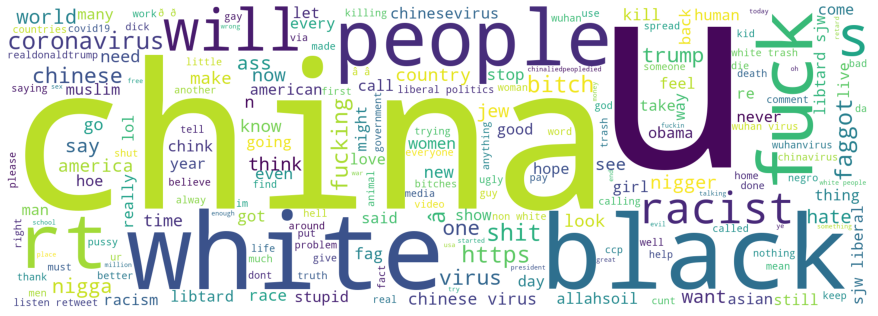

In [7]:
wordcloud = WordCloud(width = 2000, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Unsurprisingly, China is one of the biggest terms which logically follows due to the current rise in Asian hate speech

### Is There A Difference In Statistically Significant Difference Between The Length Of Hate Tweets vs Not Hate Tweets?

In [8]:
df_len = df # Make a new dataframe that we can manipulate
df_len['length'] = df_len['tweet'].apply(len) # Add a columns for the length of tweets

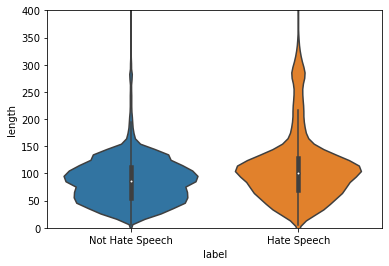

In [9]:
ax = sns.violinplot(x = 'label', y = 'length', data = df_len); #
ax.set_xticklabels(['Not Hate Speech', 'Hate Speech'])
ax.set(ylim =(0, 400));

### These violin plots are useful but don't clearly reflect whether the two groups are statistically significantly different or not. Let's run a two sample T-Test with an alpha of 0.05

In [10]:
from scipy import stats
stats.ttest_ind(df_len[df_len['label'] == 1]['length'], df_len[df_len['label'] == 0]['length'])

Ttest_indResult(statistic=39.29300040893459, pvalue=0.0)

The p-value is less then your average alpha of 0.05 which means there is a statistically significant difference between the two groups. The violin plots show that hate tweets (on average) are longer then not hate tweets

### Let's See The Distribution & Mean of Tweet Characters For Hate Speech & Not Hate Speech

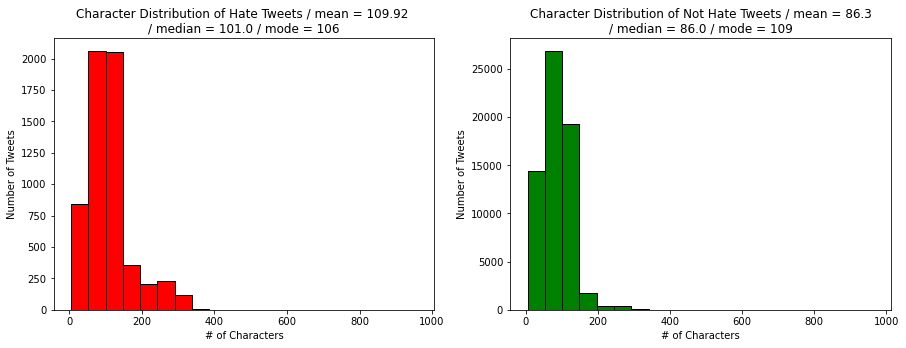

In [11]:
from statistics import mode

fig_2, ax_2 = plt.subplots(figsize = (15, 5), ncols = 2)

x_hate = df_len[df_len['label'] == 1]['length']
x_not_hate = df_len[df_len['label'] == 0]['length']

ax_2[0].hist(x_hate, bins = 20, edgecolor = 'black', color = 'red')
ax_2[0].set_title(f"""Character Distribution of Hate Tweets / mean = {round(np.mean(x_hate), 2)} 
/ median = {round(np.median(x_hate), 2)} / mode = {round(mode(x_hate), 2)}""")
ax_2[0].set_xlabel('# of Characters')
ax_2[0].set_ylabel('Number of Tweets')

ax_2[1].hist(x_not_hate, bins = 20, edgecolor = 'black', color = 'green')
ax_2[1].set_title(f"""Character Distribution of Not Hate Tweets / mean = {round(np.mean(x_not_hate), 2)}
/ median = {round(np.median(x_not_hate), 2)} / mode = {round(mode(x_not_hate), 2)}""");
ax_2[1].set_xlabel('# of Characters')
ax_2[1].set_ylabel('Number of Tweets');

Looking at the mode, quite a fair amount of tweets are around 106 - 109 characters, however, it seems that on average, hate tweets are about 24 characters longer then non-hate tweets

### Word Frequency Chart for All Tweets

#### Most Frequently Appearing Words in Hate Speech

In [12]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

In [13]:
sw = stopwords.words('english') # Just stop words to remove from the equation
sw_add = ['@user', '#', '@', 'https', 'amp', 'co', 'http', 'RT', '#','##','####','######','##########','##@user']
sw = sw + sw_add

In [47]:
hate_word_list = [] # Here we'll tokenize and lemmatize the words to make sure we're getting significantly
                    # unique words
reg_token = RegexpTokenizer("([@#a-zA-Z]+(?:'[a-z]+)?)")
for tweet in df[df['label'] == 1]['tweet'].values:
    words = reg_token.tokenize(tweet)
    lemmatizer = WordNetLemmatizer()
    for word in words:
        hate_word_list.append(lemmatizer.lemmatize(word.lower()))

In [48]:
hate_word_list = [word for word in hate_word_list if word not in sw] # remove stop words

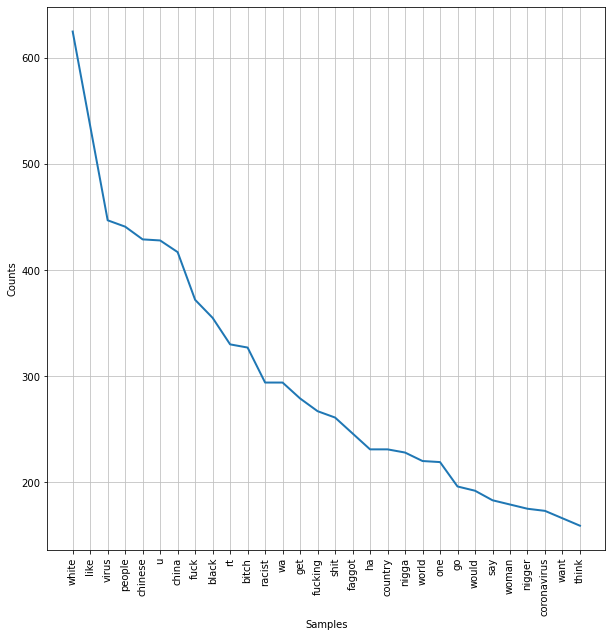

In [49]:
fdist = FreqDist(hate_word_list)
plt.figure(figsize=(10, 10))
fdist.plot(30);

#### Most Frequently Appearing Words in All Tweets

In [50]:
all_word_list = []
for tweet in df['tweet'].values:
    words = reg_token.tokenize(tweet)
    for word in words:
        all_word_list.append(lemmatizer.lemmatize(word.lower()))

In [51]:
all_word_list = [word for word in all_word_list if word not in sw]

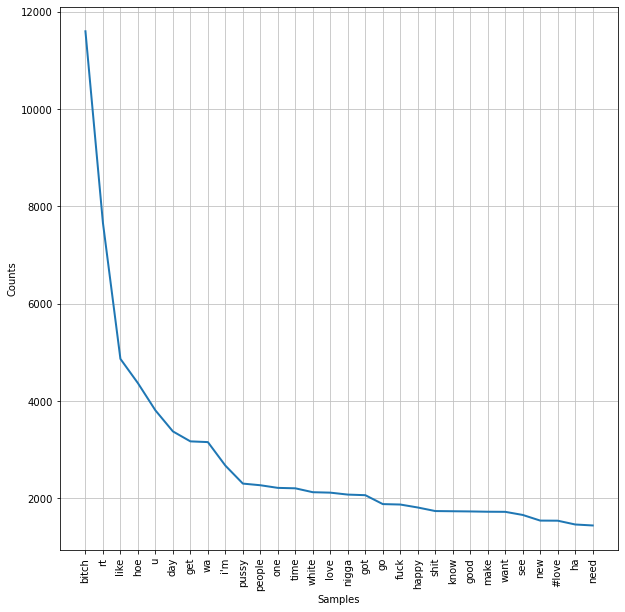

In [52]:
fdist_all = FreqDist(all_word_list)
plt.figure(figsize=(10, 10))
fdist_all.plot(30);

#### Most Frequently Appearing Words in Tweets Labeled as Not Hate

In [53]:
not_hate_word_list = [] 
for tweet in df[df['label'] == 0]['tweet'].values:
    words = reg_token.tokenize(tweet)
    for word in words:
        not_hate_word_list.append(lemmatizer.lemmatize(word.lower()))

In [54]:
not_hate_word_list = [word for word in not_hate_word_list if word not in sw]

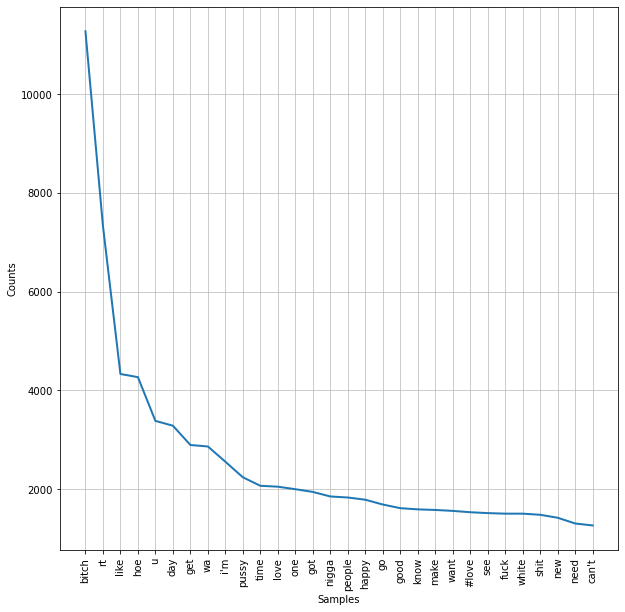

In [55]:
fdist_not = FreqDist(not_hate_word_list)
plt.figure(figsize=(10, 10))
fdist_not.plot(30);

Interestingly enough, tweets that are not hate speech still carry a considerable amount of offensive language meaning our model will have to be very good at understanding context

## Data Preparation

### TF-IDF (Term Frequency - Inverse Document Frequency)

TF-IDF will be on the methods used to test on our classifier model. It is a measure of how statistically significant a word is in a given document to its label. It does this by multiplying how many times a word appears in a document to the inverse document frequency of the word across a set of documents. The result is a score between 0 and 1. Closer to 0 means the words is barely relevant or not relevant at all if 0 (i.e., the word 'and' would likely get a score of 0 because it appears constantly in all kinds of speech so it is likely not relevant). 1 or close to 1 means the word is extremely relevant (certain racial slurs would likely get close to 1 since their presence would make it extremely likely that the given document is hate speech).

### Count Vectorizer

Count Vectorizer is another method we will test on our dataset. It simply converts each document into a vector of counts for each word or term. Certain words appearing a certain number of times will raise or drop the likelihood that that document is hate speech or not

### SMOTE

SMOTE will help us with our class imbalance. SMOTE allows us to create artifcial hate speech to add to the dataset based on the characteristics of existing hate speech in the given dataset. With SMOTE we will experiment with the classes being balanced, with hate speech v not hate speech on a 75/25 split respectively, and with hate speech v not hate speech on a 90/10 split respectively

## Modeling

### Our Best Model Is An SVC Classifier Model Using TF-IDF with SMOTE Balancing Classes Equally

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('label', axis = 1)
y = pd.DataFrame(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=3,
                                                    test_size=0.20,
                                                   stratify = y) # 80/20 split so we can properly test the model

In [25]:
token_docs = [doc for doc in X_train['tweet']]
test_token_docs = [doc for doc in X_test['tweet']] # splitting the tweets into a list instead of an array

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer

In our model notebook for SVC Classifiers, you'll be able to see that the default parameters for TF-IDF, SMOTE, and SVC worked best for our model

In [27]:
tfidf_svc_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('SMOTE', SMOTE(n_jobs = -1)),
    ('svc', SVC(verbose = True))
]) # our best pipeline

In [28]:
tfidf_svc_pipe.fit(token_docs, y_train) # fitting the data

[LibSVM]

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('SMOTE', SMOTE(n_jobs=-1)),
                ('svc', SVC(verbose=True))])

## Evaluation

#### First, How Does Our Dummy Model Do?

##### Simple Dummy Model (Picks The Majority Class Each Time):

- Training Overall Accuracy: 91.49%
- Testing Overall Accuracy: 91.50%
- AUC for ROC Curve: 0.50
- precision for not hate speech: 91%
- precision for hate speech: 0%
- recall for not hate speech: 100%
- recall for hate speech: 0%
- f1-score for not hate speech: 96%
- f1-score for hate speech: 0%

Overall Conclusion on this model: The class imbalance will pose a problem that we won't be able to use accuracy as a metric. The simple model shows that if you just pick "Not Hate Speech" every single time, the model will still be reflected as about 91.5% accuracy. This means the most important metric for this project will be precision for Hate Speech as priority #1 and then recall for Hate Speech as priority #2.

#### Let's Compare Those Precision Metrics To Our Actual Best Model

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(tfidf_svc_pipe, token_docs, y_train, scoring = 'precision', cv = 5) 
#cross - validation precision scores

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([0.79056047, 0.77683616, 0.7791411 , 0.78753541, 0.7827381 ])

In [31]:
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, classification_report

In [32]:
def evaluate_model(model, x, y):
    
    # This function will allow us to print different evaluation metrics of
    # our model
    
    y_hat = model.predict(x)
    
    return plot_confusion_matrix(model, x, y), plot_roc_curve(model, x, y), print(classification_report(y_pred = y_hat, y_true = y))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12643
           1       0.83      0.32      0.46      1175

    accuracy                           0.94     13818
   macro avg       0.88      0.66      0.71     13818
weighted avg       0.93      0.94      0.92     13818



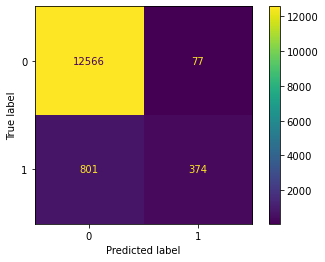

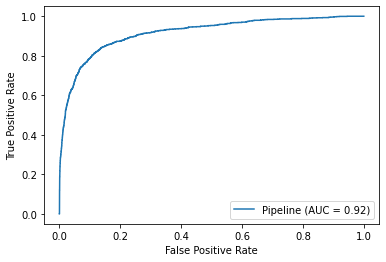

In [33]:
evaluate_model(tfidf_svc_pipe, test_token_docs, y_test); # chef's kiss!

#### What The Model Gets Right

In [34]:
y_hat = tfidf_svc_pipe.predict(test_token_docs)

In [35]:
right_list = []
for a, b, c in zip(test_token_docs, y_hat, y_test.values):
    if b == 1 and c == 1:
        right_list.append(a)

In [56]:
model_right = []
for tweet in right_list:
    words = reg_token.tokenize(tweet)
    for word in words:
        model_right.append(lemmatizer.lemmatize(word.lower()))

In [57]:
model_right = [word for word in model_right if word not in sw]

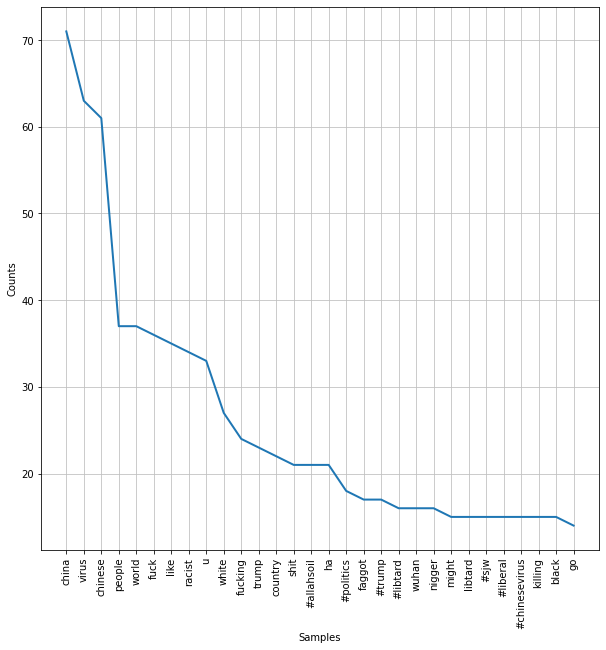

In [58]:
fdist_right = FreqDist(model_right)
plt.figure(figsize=(10, 10))
fdist_right.plot(30);

#### What The Model Missed

In [39]:
missed_list = []
for a, b, c in zip(test_token_docs, y_hat, y_test.values):
    if b == 0 and c == 1:
        missed_list.append(a)

In [59]:
model_missed = []
for tweet in missed_list:
    words = reg_token.tokenize(tweet)
    for word in words:
        model_missed.append(lemmatizer.lemmatize(word.lower()))

In [60]:
model_missed = [word for word in model_missed if word not in sw]

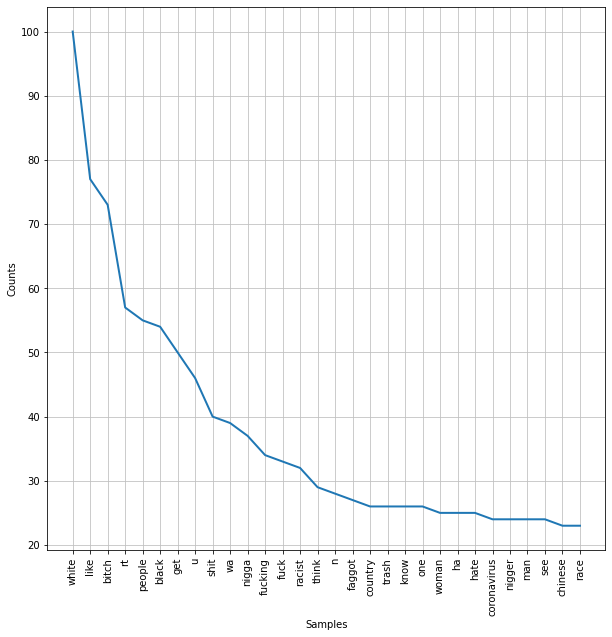

In [61]:
fdist_missed = FreqDist(model_missed)
plt.figure(figsize=(10, 10))
fdist_missed.plot(30);

#### What The Model Marked As Hate Speech But Wasn't Hate Speech

In [43]:
wrong_list = []
for a, b, c in zip(test_token_docs, y_hat, y_test.values):
    if b == 1 and c == 0:
        wrong_list.append(a)

In [62]:
model_wrong = []
for tweet in wrong_list:
    words = reg_token.tokenize(tweet)
    for word in words:
        model_wrong.append(lemmatizer.lemmatize(word.lower()))

In [63]:
model_wrong = [word for word in model_wrong if word not in sw]

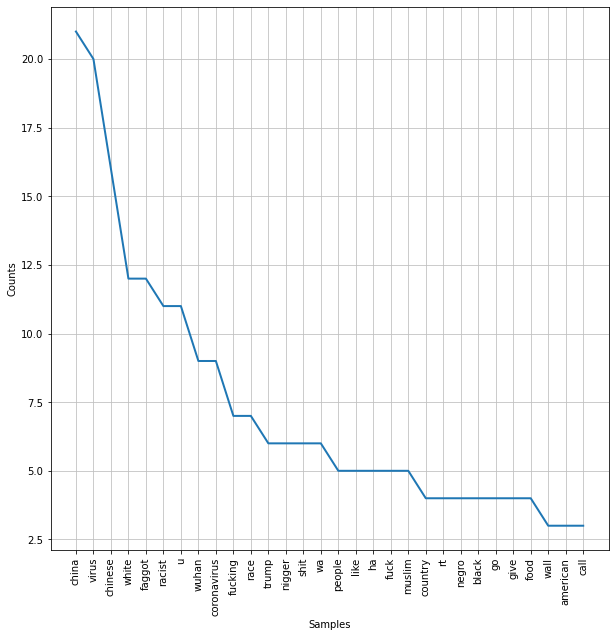

In [64]:
fdist_wrong = FreqDist(model_wrong)
plt.figure(figsize=(10, 10))
fdist_wrong.plot(30);

## How The Other Models Did

### Best Multinomial Model with TF-IDF:

- Training Overall Accuracy: 94.72%
- Testing Overall Accuracy: 92.89%
- AUC for ROC Curve: 0.89
- precision for not hate speech: 93%
- precision for hate speech: 77%
- recall for not hate speech: 99%
- recall for hate speech: 23%
- f1-score for not hate speech: 96%
- f1-score for hate speech: 36%

Overall Conclusion on this model: Our 2nd best model but not quite as precise as the SVC Classifier

### Best Multinomial Bayes Model with Count Vectorizer:

- Training Overall Accuracy: 97.98%
- Testing Overall Accuracy: 93.54%
- AUC for ROC Curve: 0.82
- precision for not hate speech: 95%
- precision for hate speech: 73%
- recall for not hate speech: 99%
- recall for hate speech: 38%
- f1-score for not hate speech: 97%
- f1-score for hate speech: 50%

Overall Conclusion on this model: 3rd Best Model. If we couldn't use our SVC Classifier for any reason. Our Multinomial Bayes Model would be our 2nd choice

### Best Logistic Regression Model with TF-IDF:

- Training Overall Accuracy: 96.02%
- Testing Overall Accuracy: 92.35%
- AUC for ROC Curve: 0.80
- precision for not hate speech: 93%
- precision for hate speech: 62%
- recall for not hate speech: 99%
- recall for hate speech: 25%
- f1-score for not hate speech: 96% 
- f1-score for hate speech: 36%

Overall Conclusion on this model: The precision isn't bad but we have other models that do better

## Best Logistic Regression with Count Vectorizer:

- Training Overall Accuracy: 92.09%
- Testing Overall Accuracy: 91.97%
- AUC for ROC Curve: 0.70
- precision for not hate speech: 92% 
- precision for hate speech: 70%
- recall for not hate speech: 100%
- recall for hate speech: 10%
- f1-score for not hate speech: 96% 
- f1-score for hate speech: 17%

Overall Conclusion on this model: Precision is much better but the recall is really bad which really doesn't make this model worth it

### Best Decision Tree Model with TF-IDF

- Training Overall Accuracy: 92.03%
- Testing Overall Accuracy: 91.95%
- AUC for ROC Curve: 0.54
- precision for not hate speech: 92%
- precision for hate speech: 76%
- recall for not hate speech: 100%
- recall for hate speech: 8%
- f1-score for not hate speech: 96% 
- f1-score for hate speech: 14%

Overall Conclusion on this model: Pretty bad at detecting hate speech. Even using SMOTE, it predicted hate speech so few times that the area under the curve for the ROC curve is nearly 0.5

## Best Decision Tree Model with Count Vectorizer

- Training Overall Accuracy: 92.04%
- Testing Overall Accuracy: 91.94%
- AUC for ROC Curve: 0.54
- precision for not hate speech: 92%
- precision for hate speech: 78%
- recall for not hate speech: 100%
- recall for hate speech: 7%
- f1-score for not hate speech: 96% 
- f1-score for hate speech: 13%

Overall Conclusion on this model: Suffers the same issues as the other Decision Tree model. Just not a good model for detecting hate speech

### Best Support Vector Classifer with Count Vectorizer

- Training Overall Accuracy: 95.71%
- Testing Overall Accuracy: 90%
- AUC for ROC Curve: 0.81
- precision for not hate speech: 94%
- precision for hate speech: 39%
- recall for not hate speech: 95%
- recall for hate speech: 32%
- f1-score for not hate speech: 95% 
- f1-score for hate speech: 35%

Overall Conclusion on this model: Significantly worst than with TF-IDF (our best model). The problem with this model is that it predicts so many tweets to be hate tweets that precision just takes a massive nose dive and recall ends up not improving

### Best ADA Boosting Model with TF-IDF 

- Training Overall Accuracy: 88.69%
- Testing Overall Accuracy: 89.30%
- AUC for ROC Curve: 0.81
- precision for not hate speech: 95%
- precision for hate speech: 40%
- recall for not hate speech: 93%
- recall for hate speech: 53%
- f1-score for not hate speech: 94%  
- f1-score for hate speech: 46%

Overall Conclusion on this model: Relatively low precision and recall. Bad at predicting hate speech

### Best ADA Boosting Model with Count Vectorizer

- Training Overall Accuracy: 65.68%
- Testing Overall Accuracy: 65.44%
- AUC for ROC Curve: 0.74
- precision for not hate speech: 96%
- precision for hate speech: 16%
- recall for not hate speech: 65%
- recall for hate speech: 70%
- f1-score for not hate speech: 77%  
- f1-score for hate speech: 26%

Overall Conclusion on this model: Good recall but at the expense of very low precision. We won't be using this model

### Best Gradient Boosting Model with TF-IDF

- Training Overall Accuracy: 89.21%
- Testing Overall Accuracy: 89.50%
- AUC for ROC Curve: 0.80
- precision for not hate speech: 93%
- precision for hate speech: 53%
- recall for not hate speech: 98%
- recall for hate speech: 24%
- f1-score for not hate speech: 96%  
- f1-score for hate speech: 36%

Overall Conclusion on this model: Not a particularly great model. Most of our other models performed better

### Best Gradient Boosting Model with Count Vectorizer

- Training Overall Accuracy: 74.23%
- Testing Overall Accuracy: 74.50%
- AUC for ROC Curve: 0.77
- precision for not hate speech: 96%  
- precision for hate speech: 19%
- recall for not hate speech: 76%
- recall for hate speech: 63%
- f1-score for not hate speech: 84%   
- f1-score for hate speech: 30%

Overall Conclusion on this model: Great recall but at the expense of precision. Not good for our needs

### Best XGBoost Model with TF-IDF

- Training Overall Accuracy: 93.23%
- Testing Overall Accuracy: 92.43%
- AUC for ROC Curve: 0.63
- precision for not hate speech: 93%   
- precision for hate speech: 73%
- recall for not hate speech: 99%
- recall for hate speech: 17%
- f1-score for not hate speech: 96%    
- f1-score for hate speech: 28%

Overall Conclusion on this model: Decent hate speech precision, recall is not great. We have quite a few models that do a lot better

### Best XGBoost Model with Count Vectorizer

- Training Overall Accuracy: 92.74%
- Testing Overall Accuracy: 92.78%
- AUC for ROC Curve: 0.84
- precision for not hate speech: 94%  
- precision for hate speech: 69%
- recall for not hate speech: 99%
- recall for hate speech: 28%
- f1-score for not hate speech: 96%     
- f1-score for hate speech: 40%

Overall Conclusion on this model: Poor recall. Precision is barely passable. We have plenty of better models

## Deployment

The deployment of a Hate Speech Predictor application can be found in the repository under the folder Hate_Speech_Predictor_Application. The application will take a given tweet and classify whether it is hate speech or not.